In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
import joblib

In [2]:
train_df = pd.read_csv("fraudTrain.csv")
train_df.head()

,Unnamed: 0,trans_date_trans_time,cc_num,merchant,category,amt,first,last,gender,street,...,lat,long,city_pop,job,dob,trans_num,unix_time,merch_lat,merch_long,is_fraud
0,0,2019-01-01 00:00:18,2703186189652095,"fraud_Rippin, Kub and Mann",misc_net,4.97,Jennifer,Banks,F,561 Perry Cove,...,36.0788,-81.1781,3495,"Psychologist, counselling",1988-03-09,0b242abb623afc578575680df30655b9,1325376018,36.011293,-82.048315,0
1,1,2019-01-01 00:00:44,630423337322,"fraud_Heller, Gutmann and Zieme",grocery_pos,107.23,Stephanie,Gill,F,43039 Riley Greens Suite 393,...,48.8878,-118.2105,149,Special educational needs teacher,1978-06-21,1f76529f8574734946361c461b024d99,1325376044,49.159047,-118.186462,0
2,2,2019-01-01 00:00:51,38859492057661,fraud_Lind-Buckridge,entertainment,220.11,Edward,Sanchez,M,594 White Dale Suite 530,...,42.1808,-112.2620,4154,Nature conservation officer,1962-01-19,a1a22d70485983eac12b5b88dad1cf95,1325376051,43.150704,-112.154481,0
3,3,2019-01-01 00:01:16,3534093764340240,"fraud_Kutch, Hermiston and Farrell",gas_transport,45.00,Jeremy,White,M,9443 Cynthia Court Apt. 038,...,46.2306,-112.1138,1939,Patent attorney,1967-01-12,6b849c168bdad6f867558c3793159a81,1325376076,47.034331,-112.561071,0
4,4,2019-01-01 00:03:06,375534208663984,fraud_Keeling-Crist,misc_pos,41.96,Tyler,Garcia,M,408 Bradley Rest,...,38.4207,-79.4629,99,Dance movement psychotherapist,1986-03-28,a41d7549acf90789359a9aa5346dcb46,1325376186,38.674999,-78.632459,0


In [3]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1296675 entries, 0 to 1296674
Data columns (total 23 columns):
 #   Column                 Non-Null Count    Dtype  
---  ------                 --------------    -----  
 0   Unnamed: 0             1296675 non-null  int64  
 1   trans_date_trans_time  1296675 non-null  object 
 2   cc_num                 1296675 non-null  int64  
 3   merchant               1296675 non-null  object 
 4   category               1296675 non-null  object 
 5   amt                    1296675 non-null  float64
 6   first                  1296675 non-null  object 
 7   last                   1296675 non-null  object 
 8   gender                 1296675 non-null  object 
 9   street                 1296675 non-null  object 
 10  city                   1296675 non-null  object 
 11  state                  1296675 non-null  object 
 12  zip                    1296675 non-null  int64  
 13  lat                    1296675 non-null  float64
 14  long              

In [4]:
train_df.describe()

,Unnamed: 0,cc_num,amt,zip,lat,long,city_pop,unix_time,merch_lat,merch_long,is_fraud
count,1.296675e+06,1.296675e+06,1.296675e+06,1.296675e+06,1.296675e+06,1.296675e+06,1.296675e+06,1.296675e+06,1.296675e+06,1.296675e+06,1.296675e+06
mean,6.483370e+05,4.171920e+17,7.035104e+01,4.880067e+04,3.853762e+01,-9.022634e+01,8.882444e+04,1.349244e+09,3.853734e+01,-9.022646e+01,5.788652e-03
std,3.743180e+05,1.308806e+18,1.603160e+02,2.689322e+04,5.075808e+00,1.375908e+01,3.019564e+05,1.284128e+07,5.109788e+00,1.377109e+01,7.586269e-02
min,0.000000e+00,6.041621e+10,1.000000e+00,1.257000e+03,2.002710e+01,-1.656723e+02,2.300000e+01,1.325376e+09,1.902779e+01,-1.666712e+02,0.000000e+00
25%,3.241685e+05,1.800429e+14,9.650000e+00,2.623700e+04,3.462050e+01,-9.679800e+01,7.430000e+02,1.338751e+09,3.473357e+01,-9.689728e+01,0.000000e+00
50%,6.483370e+05,3.521417e+15,4.752000e+01,4.817400e+04,3.935430e+01,-8.747690e+01,2.456000e+03,1.349250e+09,3.936568e+01,-8.743839e+01,0.000000e+00
75%,9.725055e+05,4.642255e+15,8.314000e+01,7.204200e+04,4.194040e+01,-8.015800e+01,2.032800e+04,1.359385e+09,4.195716e+01,-8.023680e+01,0.000000e+00
max,1.296674e+06,4.992346e+18,2.894890e+04,9.978300e+04,6.669330e+01,-6.795030e+01,2.906700e+06,1.371817e+09,6.751027e+01,-6.695090e+01,1.000000e+00


In [5]:
train_df.drop(columns=["Unnamed: 0", "trans_date_trans_time", "cc_num", "merchant", "category", "first", "last", "street", 
                       "city", "lat", "long", "job", "dob", "trans_num", "unix_time", "merch_lat", "merch_long"], inplace=True)
train_df.head()

,amt,gender,state,zip,city_pop,is_fraud
0,4.97,F,NC,28654,3495,0
1,107.23,F,WA,99160,149,0
2,220.11,M,ID,83252,4154,0
3,45.00,M,MT,59632,1939,0
4,41.96,M,VA,24433,99,0


In [6]:
train_df["state"].nunique()

51

In [7]:
train_df["is_fraud"].unique()

array([0, 1], dtype=int64)

In [8]:
counts_not_fraud = []
counts_fraud = []

for st in np.unique(train_df["state"]):
    ct = len(train_df[(train_df["is_fraud"] == 0) & (train_df["state"] == st)])
    counts_not_fraud.append(ct)
    
for st in np.unique(train_df["state"]):
    ct = len(train_df[(train_df["is_fraud"] == 1) & (train_df["state"] == st)])
    counts_fraud.append(ct)
    
print(counts_not_fraud)
print(counts_fraud)

[2084, 40774, 30966, 10733, 56034, 13767, 7686, 3592, 0, 42390, 25917, 2552, 26843, 5534, 43004, 27438, 22840, 28320, 20874, 12307, 26036, 16386, 45916, 31507, 38212, 21073, 11722, 30117, 14729, 23988, 8219, 24485, 16325, 5560, 82946, 46159, 26528, 18448, 79389, 535, 28997, 12250, 17414, 94397, 10638, 29052, 11696, 18828, 29205, 25545, 19212]
[36, 215, 161, 37, 326, 113, 16, 21, 9, 281, 146, 7, 142, 11, 248, 142, 156, 155, 91, 69, 157, 119, 238, 207, 191, 115, 32, 149, 57, 180, 59, 118, 82, 47, 555, 321, 143, 149, 458, 15, 193, 74, 140, 479, 61, 198, 72, 96, 163, 146, 110]


<function matplotlib.pyplot.show(close=None, block=None)>

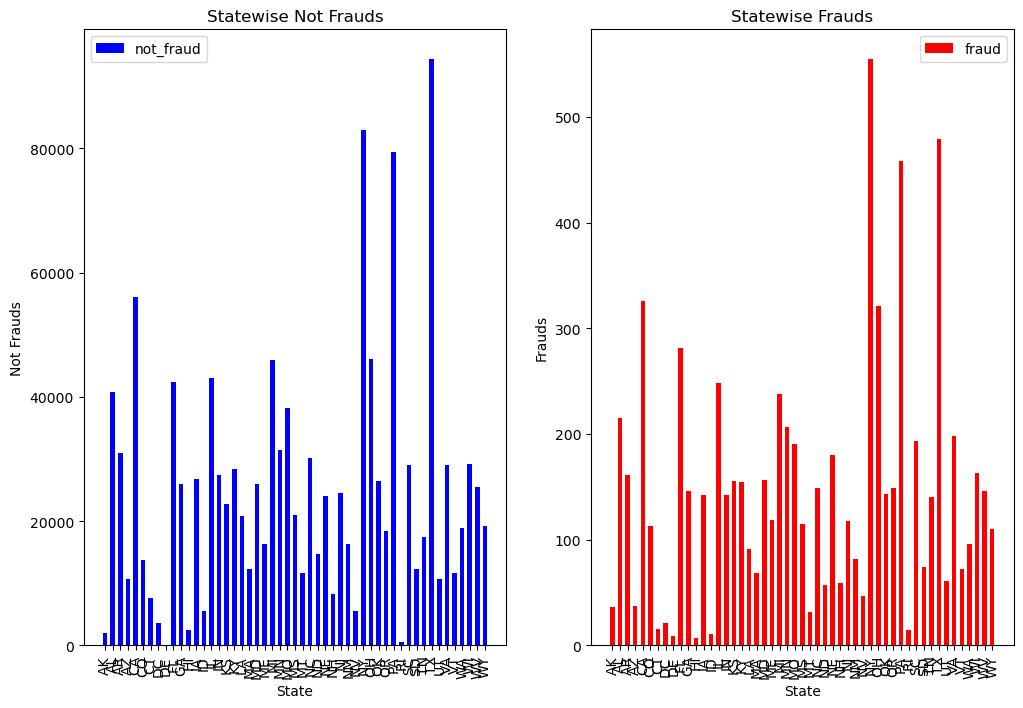

In [9]:
arr = np.arange(len(np.unique(train_df["state"])))

plt.figure(figsize=(12, 8))

plt.subplot(1, 2, 1)

plt.bar(arr, height=counts_not_fraud, width=0.6, color="blue", label="not_fraud", align="center")

plt.xlabel("State")
plt.ylabel("Not Frauds")
plt.title("Statewise Not Frauds")
plt.legend()
plt.xticks(arr, np.unique(train_df["state"]), rotation=90)

plt.subplot(1, 2, 2)

plt.bar(arr, height=counts_fraud, width=0.6, color="red", label="fraud", align="center")

plt.xlabel("State")
plt.ylabel("Frauds")
plt.title("Statewise Frauds")
plt.legend()
plt.xticks(arr, np.unique(train_df["state"]), rotation=90)

plt.show

In [10]:
train_df["state_encoded"] = LabelEncoder().fit_transform(train_df["state"])
train_df.drop(columns =["state"], inplace=True)
train_df.head()

,amt,gender,zip,city_pop,is_fraud,state_encoded
0,4.97,F,28654,3495,0,27
1,107.23,F,99160,149,0,47
2,220.11,M,83252,4154,0,13
3,45.00,M,59632,1939,0,26
4,41.96,M,24433,99,0,45


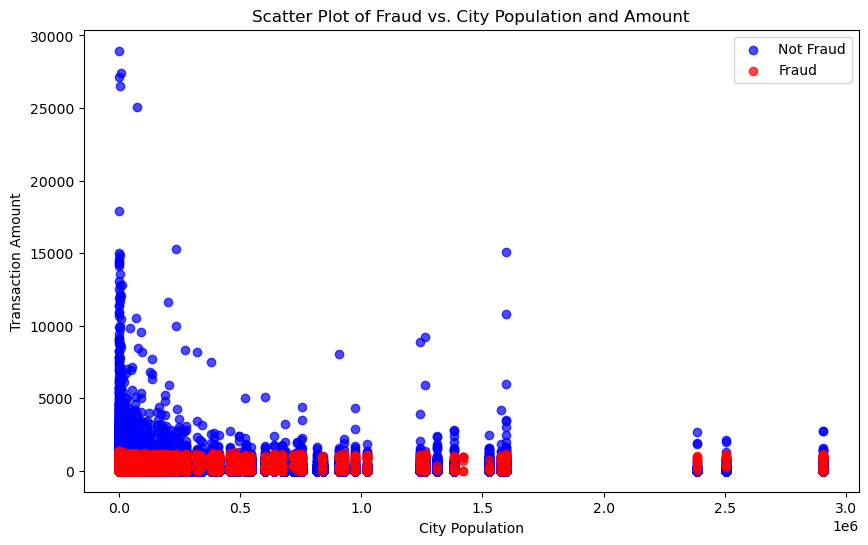

In [11]:
plt.figure(figsize=(10,6))

plt.scatter(train_df[train_df['is_fraud'] == 0]['city_pop'], train_df[train_df['is_fraud'] == 0]['amt'], 
            c='blue', label='Not Fraud', alpha=0.7)
plt.scatter(train_df[train_df['is_fraud'] == 1]['city_pop'], train_df[train_df['is_fraud'] == 1]['amt'], 
            c='red', label='Fraud', alpha=0.7)

plt.xlabel('City Population')
plt.ylabel('Transaction Amount')
plt.title('Scatter Plot of Fraud vs. City Population and Amount')
plt.legend()

plt.show()

In [12]:
fraud_below = len(train_df[(train_df['is_fraud'] == 1) & (train_df['amt'] < 2000)])
fraud_above = len(train_df[(train_df['is_fraud'] == 1) & (train_df['amt'] > 2000)])


print("Number of Fraud Transactions Below 2,000:", fraud_below)
print("Number of Fraud Transactions Above 2,000:", fraud_above)

Number of Fraud Transactions Below 2,000: 7506
Number of Fraud Transactions Above 2,000: 0


In [13]:
train_df = train_df[train_df['amt'] <= 2000]
train_df.head()

,amt,gender,zip,city_pop,is_fraud,state_encoded
0,4.97,F,28654,3495,0,27
1,107.23,F,99160,149,0,47
2,220.11,M,83252,4154,0,13
3,45.00,M,59632,1939,0,26
4,41.96,M,24433,99,0,45


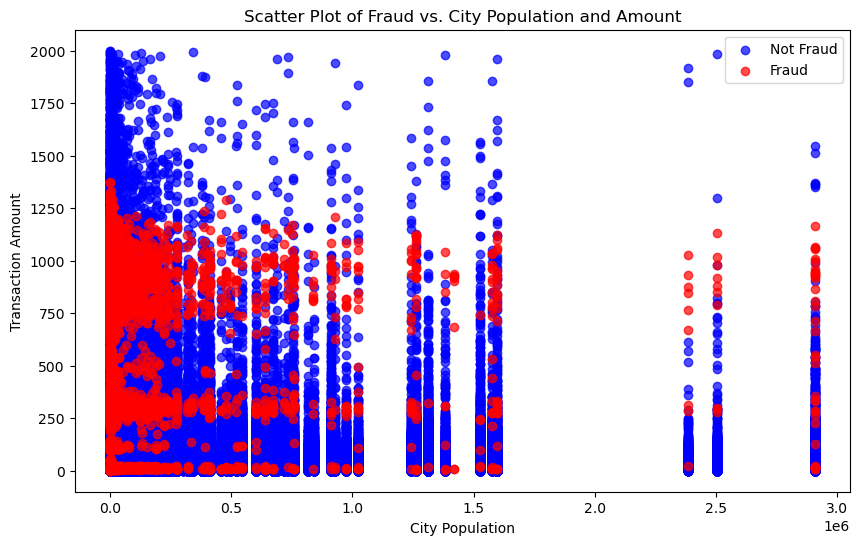

In [14]:
plt.figure(figsize=(10,6))

plt.scatter(train_df[train_df['is_fraud'] == 0]['city_pop'], train_df[train_df['is_fraud'] == 0]['amt'], 
            c='blue', label='Not Fraud', alpha=0.7)
plt.scatter(train_df[train_df['is_fraud'] == 1]['city_pop'], train_df[train_df['is_fraud'] == 1]['amt'], 
            c='red', label='Fraud', alpha=0.7)

plt.xlabel('City Population')
plt.ylabel('Transaction Amount')
plt.title('Scatter Plot of Fraud vs. City Population and Amount')
plt.legend()

plt.show()

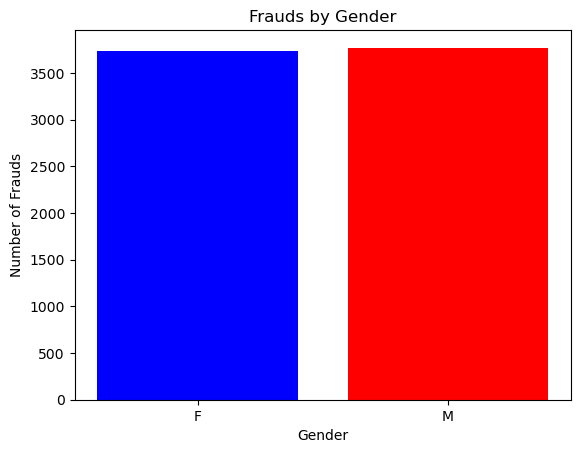

In [15]:
plt.bar(train_df.groupby('gender')['is_fraud'].sum().index, train_df.groupby('gender')['is_fraud'].sum(), color=['blue', 'red'])
plt.xlabel('Gender')
plt.ylabel('Number of Frauds')
plt.title('Frauds by Gender')

plt.show()

In [16]:
train_df['gender_encoded'] = train_df['gender'].map({'M': 0, 'F': 1})
train_df.drop(columns=["gender"], inplace=True)
train_df.head()

,amt,zip,city_pop,is_fraud,state_encoded,gender_encoded
0,4.97,28654,3495,0,27,1
1,107.23,99160,149,0,47,1
2,220.11,83252,4154,0,13,0
3,45.00,59632,1939,0,26,0
4,41.96,24433,99,0,45,0


In [17]:
train_df["zip"].nunique()

970

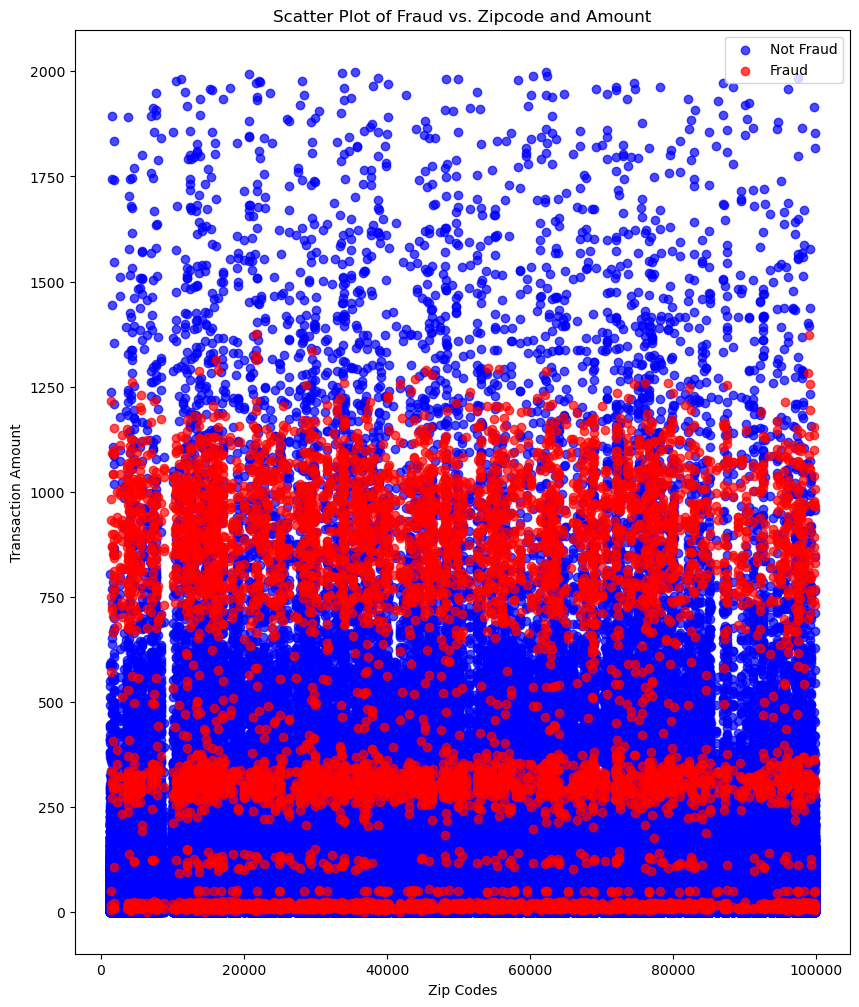

In [18]:
plt.figure(figsize=(10,12))

plt.scatter(train_df[train_df['is_fraud'] == 0]['zip'], train_df[train_df['is_fraud'] == 0]['amt'], 
            c='blue', label='Not Fraud', alpha=0.7)
plt.scatter(train_df[train_df['is_fraud'] == 1]['zip'], train_df[train_df['is_fraud'] == 1]['amt'], 
            c='red', label='Fraud', alpha=0.7)

plt.xlabel('Zip Codes')
plt.ylabel('Transaction Amount')
plt.title('Scatter Plot of Fraud vs. Zipcode and Amount')
plt.legend(loc="best")

plt.show()

In [19]:
train_df["zip_encoded"] = LabelEncoder().fit_transform(train_df["zip"])
train_df.drop(columns =["zip"], inplace=True)
train_df.head()

,amt,city_pop,is_fraud,state_encoded,gender_encoded,zip_encoded
0,4.97,3495,0,27,1,265
1,107.23,149,0,47,1,965
2,220.11,4154,0,13,0,858
3,45.00,1939,0,26,0,614
4,41.96,99,0,45,0,231


In [20]:
test_df = pd.read_csv("fraudTest.csv")
test_df.head()

,Unnamed: 0,trans_date_trans_time,cc_num,merchant,category,amt,first,last,gender,street,...,lat,long,city_pop,job,dob,trans_num,unix_time,merch_lat,merch_long,is_fraud
0,0,2020-06-21 12:14:25,2291163933867244,fraud_Kirlin and Sons,personal_care,2.86,Jeff,Elliott,M,351 Darlene Green,...,33.9659,-80.9355,333497,Mechanical engineer,1968-03-19,2da90c7d74bd46a0caf3777415b3ebd3,1371816865,33.986391,-81.200714,0
1,1,2020-06-21 12:14:33,3573030041201292,fraud_Sporer-Keebler,personal_care,29.84,Joanne,Williams,F,3638 Marsh Union,...,40.3207,-110.4360,302,"Sales professional, IT",1990-01-17,324cc204407e99f51b0d6ca0055005e7,1371816873,39.450498,-109.960431,0
2,2,2020-06-21 12:14:53,3598215285024754,"fraud_Swaniawski, Nitzsche and Welch",health_fitness,41.28,Ashley,Lopez,F,9333 Valentine Point,...,40.6729,-73.5365,34496,"Librarian, public",1970-10-21,c81755dbbbea9d5c77f094348a7579be,1371816893,40.495810,-74.196111,0
3,3,2020-06-21 12:15:15,3591919803438423,fraud_Haley Group,misc_pos,60.05,Brian,Williams,M,32941 Krystal Mill Apt. 552,...,28.5697,-80.8191,54767,Set designer,1987-07-25,2159175b9efe66dc301f149d3d5abf8c,1371816915,28.812398,-80.883061,0
4,4,2020-06-21 12:15:17,3526826139003047,fraud_Johnston-Casper,travel,3.19,Nathan,Massey,M,5783 Evan Roads Apt. 465,...,44.2529,-85.0170,1126,Furniture designer,1955-07-06,57ff021bd3f328f8738bb535c302a31b,1371816917,44.959148,-85.884734,0


In [21]:
test_df.drop(columns=["Unnamed: 0", "trans_date_trans_time", "cc_num", "merchant", "category", "first", "last", "street",
                      "city", "lat", "long", "job", "dob", "trans_num", "unix_time", "merch_lat", "merch_long"], inplace=True)
test_df.head()

,amt,gender,state,zip,city_pop,is_fraud
0,2.86,M,SC,29209,333497,0
1,29.84,F,UT,84002,302,0
2,41.28,F,NY,11710,34496,0
3,60.05,M,FL,32780,54767,0
4,3.19,M,MI,49632,1126,0


In [22]:
test_df["state_encoded"] = LabelEncoder().fit_transform(test_df["state"])
test_df.drop(columns =["state"], inplace=True)
test_df.head()

,amt,gender,zip,city_pop,is_fraud,state_encoded
0,2.86,M,29209,333497,0,39
1,29.84,F,84002,302,0,43
2,41.28,F,11710,34496,0,33
3,60.05,M,32780,54767,0,8
4,3.19,M,49632,1126,0,21


In [23]:
test_df['gender_encoded'] = test_df['gender'].map({'M': 0, 'F': 1})
test_df.drop(columns=["gender"], inplace=True)
test_df.head()

,amt,zip,city_pop,is_fraud,state_encoded,gender_encoded
0,2.86,29209,333497,0,39,0
1,29.84,84002,302,0,43,1
2,41.28,11710,34496,0,33,1
3,60.05,32780,54767,0,8,0
4,3.19,49632,1126,0,21,0


In [24]:
test_df["zip_encoded"] = LabelEncoder().fit_transform(test_df["zip"])
test_df.drop(columns =["zip"], inplace=True)
test_df.head()

,amt,city_pop,is_fraud,state_encoded,gender_encoded,zip_encoded
0,2.86,333497,0,39,0,254
1,29.84,302,0,43,1,811
2,41.28,34496,0,33,1,69
3,60.05,54767,0,8,0,291
4,3.19,1126,0,21,0,478


In [25]:
x_train = train_df.drop(columns="is_fraud")
y_train = train_df["is_fraud"]
x_test = test_df.drop(columns="is_fraud")
y_test = test_df["is_fraud"]

print(len(y_train))
print(len(y_test))

1295944
555719


# Logistic Regression


In [26]:
%%time

log_model=LogisticRegression(C=1.0, max_iter=1000)
log_model.fit(x_train, y_train)

CPU times: total: 21.9 s
Wall time: 12.3 s


LogisticRegression(max_iter=1000)

In [27]:
%%time

y_pred_log = log_model.predict(x_test)
len(y_pred_log)

CPU times: total: 125 ms
Wall time: 97 ms


555719

In [28]:
accuracy_log = accuracy_score(y_test, y_pred_log)
accuracy_log

0.9944612295062792

In [29]:
print(classification_report(y_test, y_pred_log, zero_division=1))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00    553574
           1       0.17      0.11      0.13      2145

    accuracy                           0.99    555719
   macro avg       0.58      0.55      0.57    555719
weighted avg       0.99      0.99      0.99    555719



In [30]:
confusion_matrix(y_test, y_pred_log)

array([[552401,   1173],
       [  1905,    240]], dtype=int64)

# Decision Tree

In [31]:
%%time

dt_model=DecisionTreeClassifier(criterion='gini')
dt_model.fit(x_train, y_train)

CPU times: total: 8.92 s
Wall time: 9.13 s


DecisionTreeClassifier()

In [32]:
%%time

y_pred_dt = dt_model.predict(x_test)
len(y_pred_dt)

CPU times: total: 203 ms
Wall time: 198 ms


555719

In [33]:
accuracy_dt = accuracy_score(y_test, y_pred_dt)
accuracy_dt

0.9917872162009936

In [34]:
print(classification_report(y_test, y_pred_dt))

              precision    recall  f1-score   support

           0       1.00      0.99      1.00    553574
           1       0.15      0.25      0.19      2145

    accuracy                           0.99    555719
   macro avg       0.57      0.62      0.59    555719
weighted avg       0.99      0.99      0.99    555719



In [35]:
confusion_matrix(y_test, y_pred_dt)

array([[550623,   2951],
       [  1613,    532]], dtype=int64)

# Random Forest

In [36]:
%%time

rf_model=RandomForestClassifier(n_estimators=100, criterion='entropy')
rf_model.fit(x_train, y_train)

CPU times: total: 7min 2s
Wall time: 7min 6s


RandomForestClassifier(criterion='entropy')

In [37]:
%%time

y_pred_rf = rf_model.predict(x_test)
len(y_pred_rf)

CPU times: total: 12.4 s
Wall time: 12.6 s


555719

In [38]:
accuracy_rf = accuracy_score(y_test, y_pred_rf)
accuracy_rf

0.9958054340413051

In [39]:
print(classification_report(y_test, y_pred_rf))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00    553574
           1       0.40      0.18      0.24      2145

    accuracy                           1.00    555719
   macro avg       0.70      0.59      0.62    555719
weighted avg       0.99      1.00      0.99    555719



In [40]:
confusion_matrix(y_test, y_pred_rf)

array([[553012,    562],
       [  1769,    376]], dtype=int64)

# K Nearest Neighbors

In [41]:
%%time

knn_model=KNeighborsClassifier()
knn_model.fit(x_train, y_train)

CPU times: total: 7.3 s
Wall time: 7.38 s


KNeighborsClassifier()

In [42]:
%%time

y_pred_knn = knn_model.predict(x_test)
len(y_pred_knn)

CPU times: total: 43 s
Wall time: 43.2 s


555719

In [43]:
accuracy_knn = accuracy_score(y_test, y_pred_knn)
accuracy_knn

0.9900579249584772

In [44]:
print(classification_report(y_test, y_pred_knn))

              precision    recall  f1-score   support

           0       1.00      0.99      1.00    553574
           1       0.09      0.18      0.12      2145

    accuracy                           0.99    555719
   macro avg       0.55      0.59      0.56    555719
weighted avg       0.99      0.99      0.99    555719



In [45]:
confusion_matrix(y_test, y_pred_knn)

array([[549804,   3770],
       [  1755,    390]], dtype=int64)

# Save models to external file

In [46]:
joblib.dump(log_model, "log_model.pkl")

['log_model.pkl']

In [47]:
joblib.dump(dt_model, "dt_model.pkl")

['dt_model.pkl']

In [48]:
joblib.dump(rf_model, "rf_model.pkl")

['rf_model.pkl']

In [49]:
joblib.dump(knn_model, "knn_model.pkl")

['knn_model.pkl']